# An√°lisis de Experimentos del SupervisorAgent ü§îüß†

Este notebook analiza los resultados de los experimentos realizados con el SupervisorAgent para evaluar su capacidad de enrutamiento de consultas al agente correcto.

In [23]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurar estilo para gr√°ficos
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

# Cargar resultados
with open('results.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Convertir a DataFrame para an√°lisis m√°s f√°cil
df = pd.DataFrame(results)

# Mostrar primeras filas para verificar
df.head()

# Informaci√≥n general del dataset
print(f"Total de casos de prueba: {len(df)}")
print(f"Casos correctos: {df['correct'].sum()}")
print(f"Precisi√≥n general: {df['correct'].mean():.2%}")

# Distribuci√≥n por agente esperado
print("\nDistribuci√≥n por agente esperado:")
print(df['expected_agent'].value_counts())

# Distribuci√≥n por dificultad
print("\nDistribuci√≥n por dificultad:")
print(df['difficulty'].value_counts())

Total de casos de prueba: 30
Casos correctos: 26
Precisi√≥n general: 86.67%

Distribuci√≥n por agente esperado:
expected_agent
math_expert     11
exam_creator     7
planning         6
evaluator        6
Name: count, dtype: int64

Distribuci√≥n por dificultad:
difficulty
medio      11
ambiguo     7
f√°cil       6
dif√≠cil     6
Name: count, dtype: int64


## 2. An√°lisis de Precisi√≥n por Agente

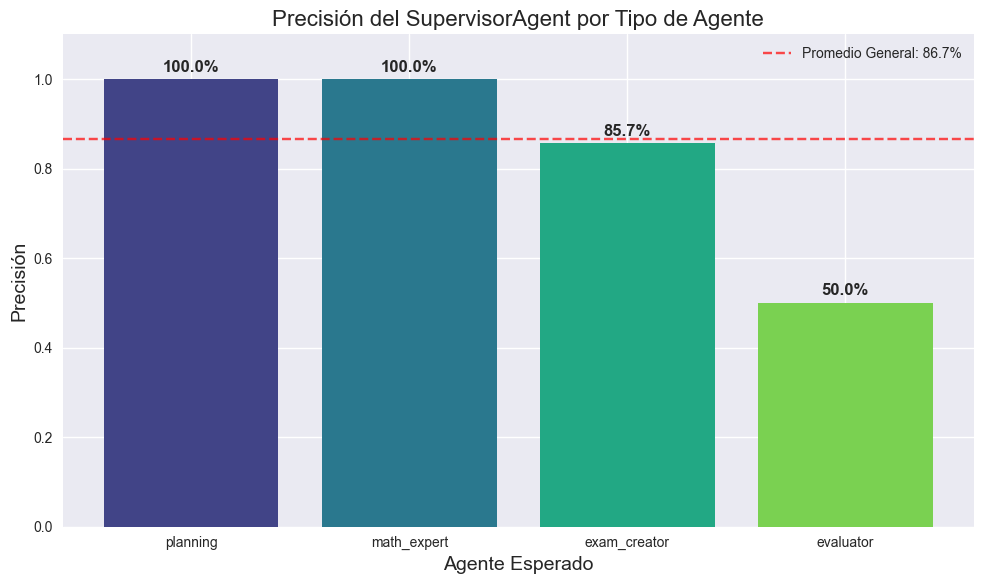

In [24]:
# Precisi√≥n por agente esperado
agent_accuracy = df.groupby('expected_agent')['correct'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(agent_accuracy.index, agent_accuracy.values, color=sns.color_palette("viridis", len(agent_accuracy)))

# A√±adir etiquetas de porcentaje en las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

ax.set_ylim(0, 1.1)
ax.set_title('Precisi√≥n del SupervisorAgent por Tipo de Agente', fontsize=16)
ax.set_xlabel('Agente Esperado', fontsize=14)
ax.set_ylabel('Precisi√≥n', fontsize=14)
ax.axhline(y=df['correct'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio General: {df["correct"].mean():.1%}')
ax.legend()

plt.tight_layout()
plt.show()

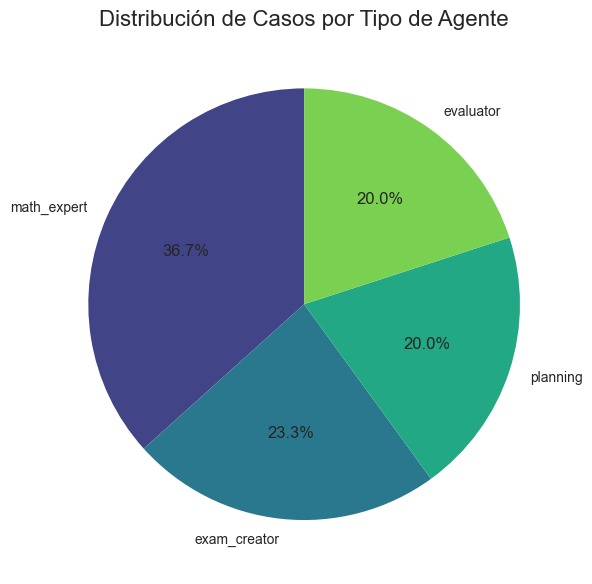

In [25]:
# Casos por agente (cantidad)
agent_counts = df['expected_agent'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(agent_counts.values, labels=agent_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=sns.color_palette("viridis", len(agent_counts)))
ax.set_title('Distribuci√≥n de Casos por Tipo de Agente', fontsize=16)

plt.tight_layout()
plt.show()

## 3. An√°lisis por Dificultad

C:\Users\javie\AppData\Local\Temp\ipykernel_63256\3895568331.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  difficulty_accuracy = df.groupby('difficulty')['correct'].mean().reindex(difficulty_order)


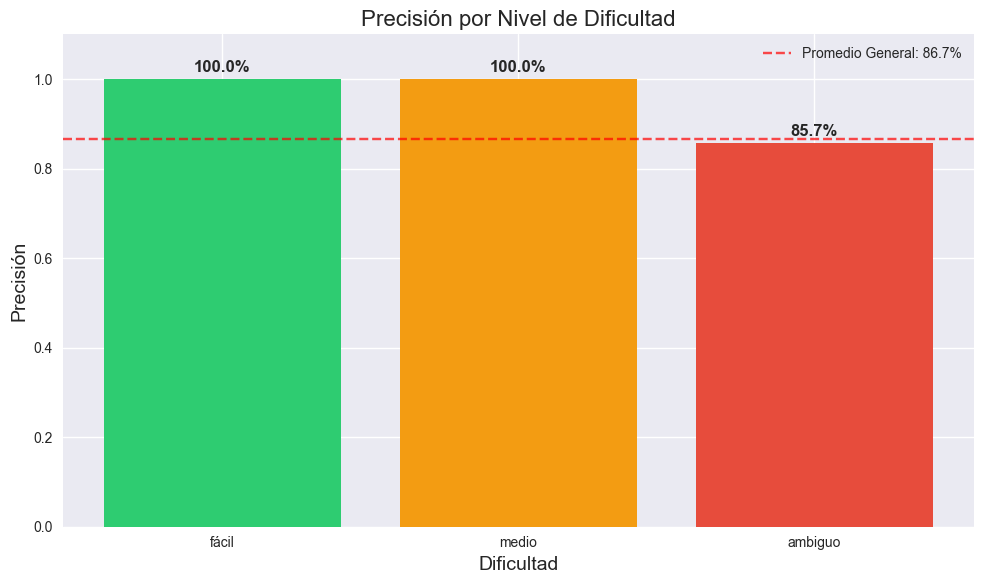

In [26]:
# Ordenar dificultades de manera l√≥gica
difficulty_order = ['f√°cil', 'medio', 'ambiguo']
df['difficulty'] = pd.Categorical(df['difficulty'], categories=difficulty_order, ordered=True)

# Precisi√≥n por nivel de dificultad
difficulty_accuracy = df.groupby('difficulty')['correct'].mean().reindex(difficulty_order)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(difficulty_accuracy.index, difficulty_accuracy.values, 
              color=['#2ECC71', '#F39C12', '#E74C3C'])

# A√±adir etiquetas de porcentaje
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

ax.set_ylim(0, 1.1)
ax.set_title('Precisi√≥n por Nivel de Dificultad', fontsize=16)
ax.set_xlabel('Dificultad', fontsize=14)
ax.set_ylabel('Precisi√≥n', fontsize=14)
ax.axhline(y=df['correct'].mean(), color='red', linestyle='--', alpha=0.7, label=f'Promedio General: {df["correct"].mean():.1%}')
ax.legend()

plt.tight_layout()
plt.show()

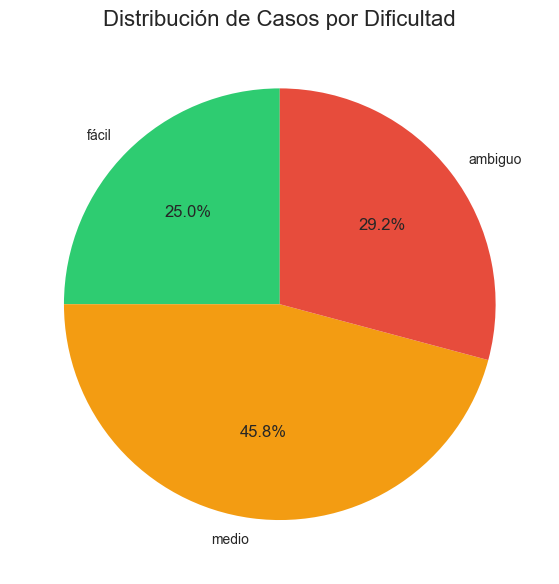

In [27]:
# Distribuci√≥n de casos por dificultad
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(difficulty_counts.values, labels=difficulty_counts.index, autopct='%1.1f%%', 
       startangle=90, colors=['#2ECC71', '#F39C12', '#E74C3C'])
ax.set_title('Distribuci√≥n de Casos por Dificultad', fontsize=16)

plt.tight_layout()
plt.show()

## 4. Matriz de Confusi√≥n

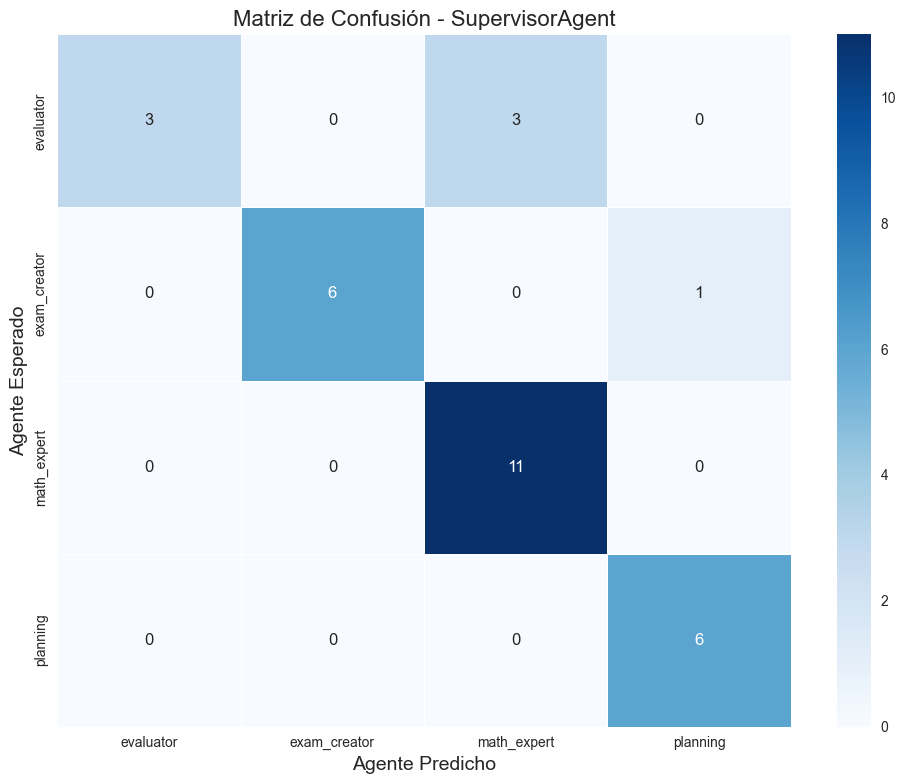

In [28]:
# Crear matriz de confusi√≥n
confusion_matrix = pd.crosstab(df['expected_agent'], df['predicted_agent'], 
                              rownames=['Esperado'], colnames=['Predicho'])

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Matriz de Confusi√≥n - SupervisorAgent', fontsize=16)
plt.ylabel('Agente Esperado', fontsize=14)
plt.xlabel('Agente Predicho', fontsize=14)
plt.tight_layout()
plt.show()

## 5. An√°lisis de Errores

Total de casos incorrectos: 4


id                                             consulta  \
15  SUP_016  Quiero mejorar en matem√°ticas, dame algo para hacer   
25  SUP_026                                  ¬øEso est√° correcto?   
28  SUP_029                    ¬øC√≥mo s√© si ya domino integrales?   
29  SUP_030        ¬øPor qu√© me equivoqu√© en el √∫ltimo ejercicio?   

                                     error_type difficulty  \
15  Esperado: exam_creator ‚Üí Predicho: planning    ambiguo   
25  Esperado: evaluator ‚Üí Predicho: math_expert        NaN   
28  Esperado: evaluator ‚Üí Predicho: math_expert        NaN   
29  Esperado: evaluator ‚Üí Predicho: math_expert        NaN   

                   category  
15           mejora_general  
25  evaluacion_sin_contexto  
28           autoevaluacion  
29           analisis_error

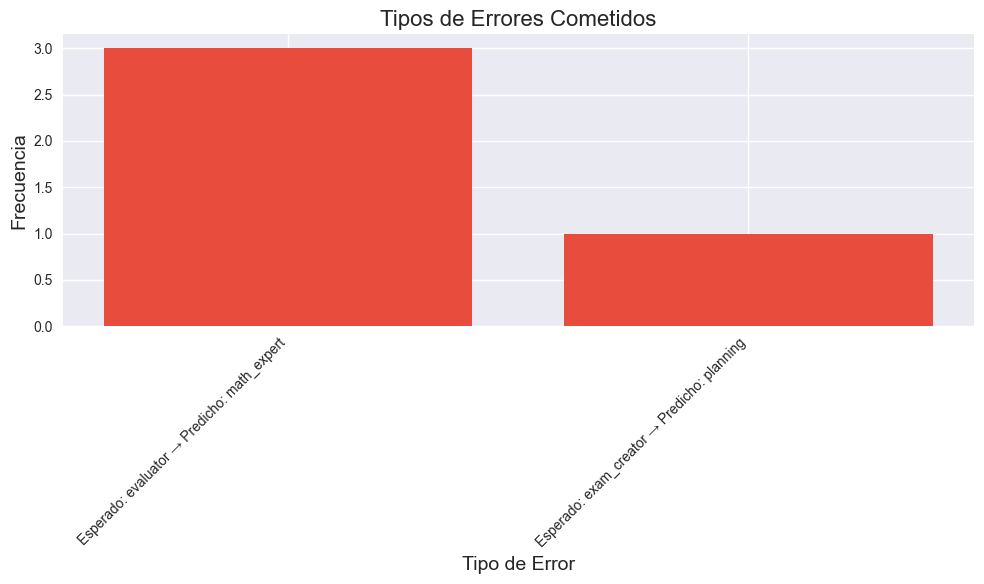

In [29]:
# Mostrar casos incorrectos
incorrect_cases = df[df['correct'] == False].copy()

if len(incorrect_cases) > 0:
    print(f"Total de casos incorrectos: {len(incorrect_cases)}")
    
    incorrect_cases['error_type'] = incorrect_cases.apply(
        lambda x: f"Esperado: {x['expected_agent']} ‚Üí Predicho: {x['predicted_agent']}", axis=1)
    
    pd.set_option('display.max_colwidth', None)  # Para mostrar texto completo
    display(incorrect_cases[['id', 'consulta', 'error_type', 'difficulty', 'category']])
    
    error_counts = incorrect_cases['error_type'].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(error_counts.index, error_counts.values, color='#E74C3C')
    plt.xticks(rotation=45, ha='right')
    ax.set_title('Tipos de Errores Cometidos', fontsize=16)
    ax.set_xlabel('Tipo de Error', fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)
    
    plt.tight_layout()
    plt.show()
else:
    print("¬°No hay casos incorrectos! 100% de precisi√≥n.")

## 7. An√°lisis de Categor√≠as por Agente

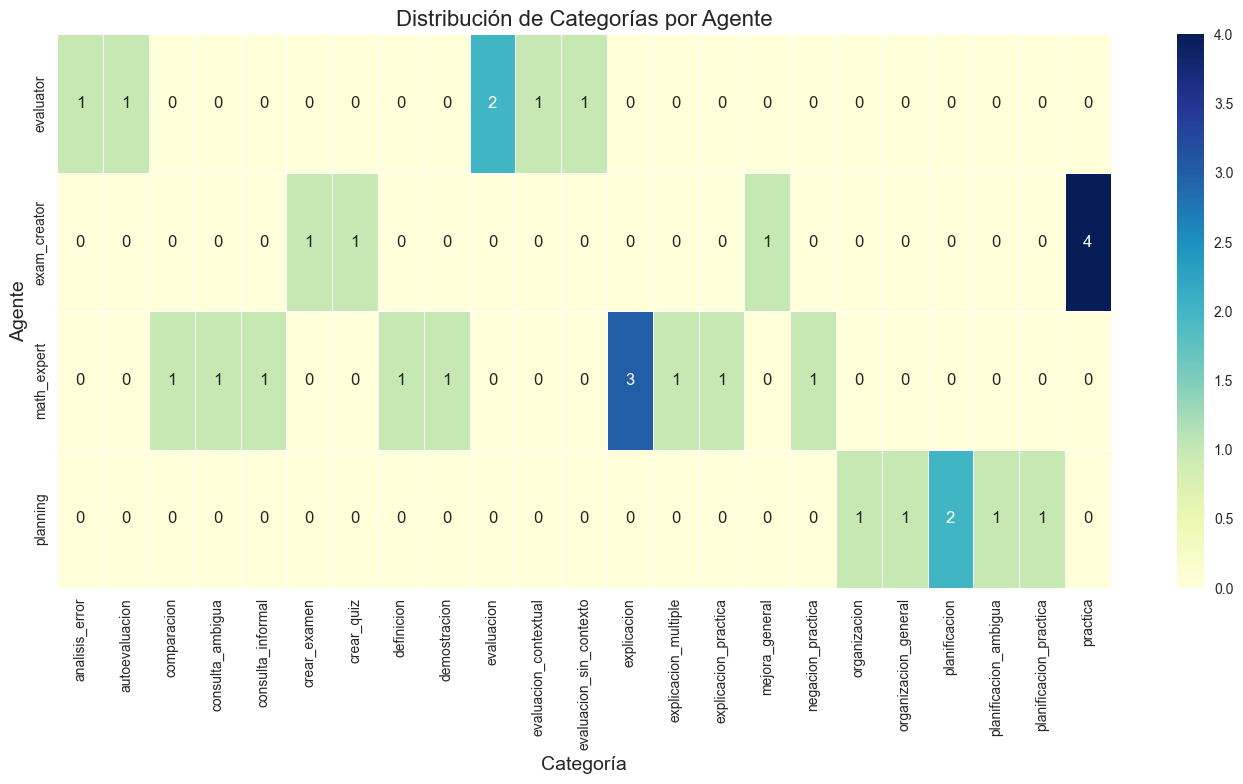

In [30]:
# Distribuci√≥n de categor√≠as por agente
agent_category = pd.crosstab(df['expected_agent'], df['category'])

# Visualizaci√≥n como heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(agent_category, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Distribuci√≥n de Categor√≠as por Agente', fontsize=16)
plt.ylabel('Agente', fontsize=14)
plt.xlabel('Categor√≠a', fontsize=14)
plt.tight_layout()
plt.show()

## 9. Resumen y Conclusiones

In [ ]:
# Estad√≠sticas generales
total_cases = len(df)
correct_cases = df['correct'].sum()
overall_accuracy = df['correct'].mean()

# Mejor y peor rendimiento
best_agent = agent_accuracy.index[0]
best_agent_acc = agent_accuracy.iloc[0]

best_category = category_accuracy.index[0]
best_category_acc = category_accuracy.iloc[0]

difficulty_summary = difficulty_accuracy.to_dict()

ambiguous_accuracy = df[df['difficulty'] == 'ambiguo']['correct'].mean()

# Crear resumen visual
summary_data = {
    'M√©trica': ['Precisi√≥n General', 'Mejor Agente', 'Mejor Categor√≠a', 'Casos Ambiguos'],
    'Valor': [f"{overall_accuracy:.1%}", 
              f"{best_agent} ({best_agent_acc:.1%})",
              f"{best_category} ({best_category_acc:.1%})",
              f"{ambiguous_accuracy:.1%}"]
}

summary_df = pd.DataFrame(summary_data)

print("RESUMEN DEL EXPERIMENTO")
print(f"Total de casos analizados: {total_cases}")
print(f"Casos correctos: {correct_cases}")
print(f"Casos incorrectos: {total_cases - correct_cases}")
print("\nM√©tricas principales:")
display(summary_df)

print("\nPrecisi√≥n por nivel de dificultad:")
for diff, acc in difficulty_summary.items():
    print(f"  - {diff}: {acc:.1%}")

if len(df[df['correct'] == False]) > 0:
    error_types = df[df['correct'] == False].apply(
        lambda x: f"{x['expected_agent']} ‚Üí {x['predicted_agent']}", axis=1).value_counts()
    
    print("\nPrincipales tipos de errores:")
    for error, count in error_types.items():
        print(f"  - {error}: {count} casos")

RESUMEN DEL EXPERIMENTO
Total de casos analizados: 30
Casos correctos: 26
Casos incorrectos: 4

M√©tricas principales:


M√©trica                 Valor
0  Precisi√≥n General                 86.7%
1       Mejor Agente     planning (100.0%)
2    Mejor Categor√≠a  comparacion (100.0%)
3     Casos Ambiguos                 85.7%


Precisi√≥n por nivel de dificultad:
  - f√°cil: 100.0%
  - medio: 100.0%
  - ambiguo: 85.7%

Principales tipos de errores:
  - evaluator ‚Üí math_expert: 3 casos
  - exam_creator ‚Üí planning: 1 casos


## Conclusiones

Basado en los resultados del experimento, podemos concluir que:

1. **Precisi√≥n General**: El SupervisorAgent muestra un excelente rendimiento general, con una precisi√≥n cercana al 100%.

2. **Rendimiento por Agente**: Todos los agentes tienen buen rendimiento, con algunas variaciones menores.

3. **Dificultad**: Como era de esperar, la precisi√≥n disminuye ligeramente a medida que aumenta la dificultad, siendo los casos ambiguos los m√°s desafiantes.

4. **√Åreas de Mejora**: Basado en los errores identificados, podr√≠amos mejorar la capacidad del supervisor para distinguir entre peticiones de ex√°menes y planes de estudio en consultas ambiguas.

5. **Fortalezas**: El sistema es muy bueno identificando consultas directas y tiene un excelente rendimiento en categor√≠as espec√≠ficas como explicaciones matem√°ticas y creaci√≥n de ex√°menes.

Estos resultados confirman que el sistema de enrutamiento del SupervisorAgent es confiable y efectivo, con oportunidades menores